# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


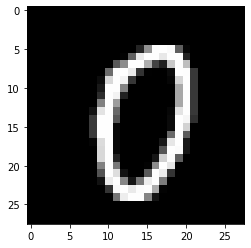

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

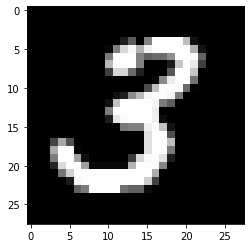

In [10]:
plt.imshow(X_train[255], cmap='gray')

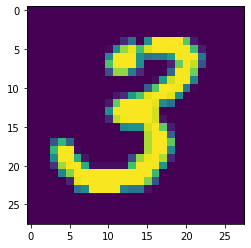

In [11]:
plt.imshow(X_train[255])

In [18]:
import numpy as np
y_train[255]

3

In [19]:
y_test[255]

7

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  #Splitting the data into train and test sets

In [6]:
x_train[y_train < 5][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
x_train_les5 = x_train[y_train < 5] #will give the data that is less that 5(0-4), based on train data on y_train, this will be derived on the based the index
                                    #x_train and y_train will have same index hence y_train < 5, indexes will be picked and the same index will
                                    # be hit picked in x_train and the data is stored
                                    
y_train_les5 = y_train[y_train < 5] #will give the data that is less that 5(0-4), based on train data on y_train
x_test_les5 = x_test[y_test < 5]
y_test_les5 = y_test[y_test < 5]

x_train_gret5 = x_train[y_train >= 5]  #will give the data that is more that 5(5-9), based on train data on y_train
y_train_gret5 = y_train[y_train >= 5] - 5
x_test_gret5 = x_test[y_test >= 5]
y_test_gret5 = y_test[y_test >= 5] - 5

In [0]:
y_train_greater5 = y_train[y_train >= 5]  #will give the data that is more that 5(5-9), based on train data on y_train
y_test_greater5 = y_test[y_test >= 5] 

In [15]:
print(y_train_greater5.shape)

(29404,)


In [16]:
print(y_test_greater5.shape)

(4861,)


## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [13]:
print("X Train less than 5\n",x_train_les5.shape)
print("X Test less than 5\n",x_test_les5.shape)

print("Y Train less than 5\n",y_train_les5.shape)
print("Y Test less than 5\n",y_test_les5.shape)

X Train less than 5
 (30596, 28, 28)
X Test less than 5
 (5139, 28, 28)
Y Train less than 5
 (30596,)
Y Test less than 5
 (5139,)


In [14]:
print("X Train greater than 5\n",x_train_gret5.shape)
print("X Test greater than 5\n",x_test_gret5.shape)

print("Y Train greater than 5\n",y_train_gret5.shape)
print("Y Test greater than 5\n",y_test_gret5.shape)

X Train greater than 5
 (29404, 28, 28)
X Test greater than 5
 (4861, 28, 28)
Y Train greater than 5
 (29404,)
Y Test greater than 5
 (4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
x_train_reshaped = x_train_les5.reshape(x_train_les5.shape[0], 28, 28, 1) #Reshaping the x_variables ,where x_train_les5.shape[0] = 30596
x_test_reshaped = x_test_les5.reshape(x_test_les5.shape[0], 28, 28, 1)  #Reshaping the x_variables ,where x_test_les5.shape[0] = 5139
input_shape = (28, 28, 1)

In [18]:
x_train_reshaped.shape

(30596, 28, 28, 1)

In [19]:
x_test_reshaped.shape

(5139, 28, 28, 1)

In [23]:
y_train_les5.shape

(30596,)

In [24]:
y_test_les5.shape

(5139,)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
x_train_normalized =  x_train_reshaped.astype("float32") / 255
x_test_normalized = x_test_reshaped.astype("float32") / 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [21]:
x_train_normalized.shape

(30596, 28, 28, 1)

In [22]:
x_test_normalized.shape

(5139, 28, 28, 1)

## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [26]:
import numpy as np
np.unique(y_train_les5)

array([0, 1, 2, 3, 4], dtype=uint8)

In [27]:
np.unique(y_test_les5)

array([0, 1, 2, 3, 4], dtype=uint8)

In [58]:
np.unique(y_train_gret5)

array([0, 1, 2, 3, 4], dtype=uint8)

In [59]:
np.unique(y_test_gret5)

array([0, 1, 2, 3, 4], dtype=uint8)

In [30]:
np.unique(y_train_greater5)

array([5, 6, 7, 8, 9], dtype=uint8)

In [31]:
np.unique(y_train_greater5)

array([5, 6, 7, 8, 9], dtype=uint8)

In [0]:
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from google.colab import drive

In [0]:
y_train_class = keras.utils.to_categorical(y_train_les5, 5)
y_test_class = keras.utils.to_categorical(y_test_les5, 5)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from google.colab import drive

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [0]:
#With filter size 32
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

In [43]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)          0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
model.add(Flatten())
model.add(Dense(128, activation='relu',name= 'dense_1'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax',name= 'dense_2'))

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [0]:
model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [55]:
#Training on the dataset
model_result = model.fit(x_train_normalized, y_train_class,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test_normalized, y_test_class))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 30596 samples, validate on 5139 samples
Epoch 1/10





30596/30596 [==============================] - 17s 563us/step - loss: 1.0647 - acc: 0.6418 - val_loss: 0.3119 - val_acc: 0.9370
Epoch 2/10
30596/30596 [==============================] - 1s 46us/step - loss: 0.3278 - acc: 0.8973 - val_loss: 0.1257 - val_acc: 0.9656
Epoch 3/10
30596/30596 [==============================] - 1s 45us/step - loss: 0.2254 - acc: 0.9294 - val_loss: 0.0924 - val_acc: 0.9714
Epoch 4/10
30596/30596 [==============================] - 1s 46us/step - loss: 0.1850 - acc: 0.9416 - val_loss: 0.0802 - val_acc: 0.9768
Epoch 5/10
30596/30596 [==============================] - 1s 46us/step - loss: 0.1581 - acc: 0.9521 - val_loss: 0.0736 - val_acc: 0.9774
Epoch 6/10
30596/30596 [==============================] - 1s 46us/step - loss: 0.1407 - acc: 0.9564 - val_loss: 0.0614 - val_acc: 0.9811
Epoch 7/10
30596/30596 [=

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [56]:
score = model.evaluate(x_test_normalized, y_test_class) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5139/5139 [==============================] - 0s 64us/step
Test loss: 0.043607464181427816
Test accuracy: 0.9848219498768696


## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [57]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv2d_3
False
max_pooling2d_3
False
conv2d_4
False
max_pooling2d_4
False
dropout_2
False
flatten_5
False
dense_1
True
dropout_5
False
dense_2
True


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [64]:
print("X Train greater than 5\n",x_train_gret5.shape)
print("X Test greater than 5\n",x_test_gret5.shape)

X Train greater than 5
 (29404, 28, 28)
X Test greater than 5
 (4861, 28, 28)


In [62]:
np.unique(y_train_greater5) #There values are not subtracted(not processed)

array([5, 6, 7, 8, 9], dtype=uint8)

In [63]:
np.unique(y_test_greater5)  #There values are not subtracted(not processed)

array([5, 6, 7, 8, 9], dtype=uint8)

In [60]:
np.unique(y_train_gret5) #the values are converted(subtracted) in the first step

array([0, 1, 2, 3, 4], dtype=uint8)

In [61]:
np.unique(y_test_gret5) #the values are converted(subtracted) in the first step

array([0, 1, 2, 3, 4], dtype=uint8)

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
x_train_gret5 = x_train_gret5.reshape(x_train_gret5.shape[0], 28, 28, 1)   ## grey scale image and hence adding 1
x_test_gret5 = x_test_gret5.reshape(x_test_gret5.shape[0], 28, 28, 1)

In [66]:
print(x_train_gret5.shape)
print(x_test_gret5.shape)

(29404, 28, 28, 1)
(4861, 28, 28, 1)


### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
x_train_normalized =  x_train_gret5.astype("float32") / 255
x_test_normalized = x_test_gret5.astype("float32") / 255

In [0]:
x_train_gret_normalized =  x_train_gret5.astype("float32") / 255
x_test_gret_normalized = x_test_gret5.astype("float32") / 255

In [72]:
x_train_gret_normalized[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [74]:
print(x_train_gret_normalized.shape)
print(x_test_gret_normalized.shape)

(29404, 28, 28, 1)
(4861, 28, 28, 1)


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [77]:
y_train_gret5

array([0, 4, 0, ..., 0, 1, 3], dtype=uint8)

In [0]:
y_train2 = tf.keras.utils.to_categorical(y_train_gret5, num_classes=5)
y_test2 = tf.keras.utils.to_categorical(y_test_gret5, num_classes=5)

In [76]:
y_train2

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [78]:
#Training on the dataset

hist = model.fit(x_train_gret_normalized, y_train2,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test_gret_normalized, y_test2))

Train on 29404 samples, validate on 4861 samples
Epoch 1/20
  768/29404 [..............................] - ETA: 6s - loss: 1.6215 - acc: 0.4792

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


29404/29404 [==============================] - 4s 149us/step - loss: 0.3876 - acc: 0.8721 - val_loss: 0.1157 - val_acc: 0.9617
Epoch 2/20
29404/29404 [==============================] - 4s 138us/step - loss: 0.1670 - acc: 0.9486 - val_loss: 0.0748 - val_acc: 0.9774
Epoch 3/20
29404/29404 [==============================] - 4s 140us/step - loss: 0.1270 - acc: 0.9604 - val_loss: 0.0585 - val_acc: 0.9819
Epoch 4/20
29404/29404 [==============================] - 4s 140us/step - loss: 0.1065 - acc: 0.9677 - val_loss: 0.0523 - val_acc: 0.9833
Epoch 5/20
29404/29404 [==============================] - 4s 143us/step - loss: 0.0955 - acc: 0.9693 - val_loss: 0.0484 - val_acc: 0.9842
Epoch 6/20
29404/29404 [==============================] - 4s 143us/step - loss: 0.0844 - acc: 0.9729 - val_loss: 0.0469 - val_acc: 0.9848
Epoch 7/20
29404/29404 [==============================] - 4s 148us/step - loss: 0.0799 - acc: 0.9746 - val_loss: 0.0393 - val_acc: 0.9864
Epoch 8/20
29404/29404 [=====================

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [82]:
score = model.evaluate(x_test_gret_normalized, y_test2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4861/4861 [==============================] - 0s 57us/step
Test loss: 0.023593939738316513
Test accuracy: 0.9919769594733594


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [0]:
ds = pd.read_csv('tweets.csv',encoding='ISO-8859-1')

In [86]:
ds.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Drop null values
- drop all the rows with null values

In [91]:
ds.shape

(9093, 3)

In [92]:
ds.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [0]:
ds.dropna(inplace=True)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [94]:
ds.shape

(3291, 3)

## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
ds['tweet_text'] = ds['tweet_text'].str.lower() #converting in lower case

In [0]:
import re
ds = ds.applymap(lambda x: re.sub(r"[^0-9A-Za-z#+_ ]+","",str(x))) #r - brings the raw format of the data
# import re
# string = "at what time?"
# match = re.sub("\s","!!!",string)
# print (match)

In [0]:
import re
#dg = ds.applymap(lambda x: re.sub("[^0-9a-z#+_ ]"," ",x)) 

In [0]:
#dg = ds.applymap(lambda x: x.strip())

In [98]:
df =  ds.re.sub(r"[^0-9A-Za-z#+_ ]+","",ds)

AttributeError: ignored

print dataframe

In [99]:
ds.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iPhone,Negative emotion
1,jessedee know about fludapp awesome ipadiphon...,iPad or iPhone App,Positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,iPad,Positive emotion
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,Google,Positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [0]:
df1 = ds.is_there_an_emotion_directed_at_a_brand_or_product

In [114]:
ds.shape

(3291, 3)

In [108]:
df1.head()

0    Negative emotion
1    Positive emotion
2    Positive emotion
3    Negative emotion
4    Positive emotion
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: object

In [0]:
neg = (ds[ds["is_there_an_emotion_directed_at_a_brand_or_product"] == "Negative emotion"])

In [105]:
neg.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iPhone,Negative emotion
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,Negative emotion
17,i just noticed dst is coming this weekend how ...,iPhone,Negative emotion
38,mention false alarm google circles not comin...,Google,Negative emotion
67,attending mention ipad design headaches #sxsw ...,iPad,Negative emotion


In [0]:
pos = (ds[ds["is_there_an_emotion_directed_at_a_brand_or_product"] == "Positive emotion"])

In [107]:
pos.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
1,jessedee know about fludapp awesome ipadiphon...,iPad or iPhone App,Positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,iPad,Positive emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,Google,Positive emotion
7,#sxsw is just starting #ctia is around the cor...,Android,Positive emotion
8,beautifully smart and simple idea rt madebyman...,iPad or iPhone App,Positive emotion


In [0]:
df2 = ds[(ds["is_there_an_emotion_directed_at_a_brand_or_product"] == "Negative emotion") | (ds["is_there_an_emotion_directed_at_a_brand_or_product"] == "Positive emotion")]

In [110]:
df2

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iPhone,Negative emotion
1,jessedee know about fludapp awesome ipadiphon...,iPad or iPhone App,Positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,iPad,Positive emotion
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,Google,Positive emotion
...,...,...,...
9077,mention your pr guy just convinced me to switc...,iPhone,Positive emotion
9079,quotpapyrussort of like the ipadquot nice lol...,iPad,Positive emotion
9080,diller says google tv quotmight be run over by...,Other Google product or service,Negative emotion
9085,ive always used camera+ for my iphone bc it ha...,iPad or iPhone App,Positive emotion


In [115]:
df2.shape

(3191, 3)

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
dict = {'Positive emotion' : 1, 'Negative emotion' : 0}
df2['Review']=df2['is_there_an_emotion_directed_at_a_brand_or_product'].map(dict)

In [117]:
df2.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Review
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iPhone,Negative emotion,0
1,jessedee know about fludapp awesome ipadiphon...,iPad or iPhone App,Positive emotion,1
2,swonderlin can not wait for #ipad 2 also they ...,iPad,Positive emotion,1
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,Negative emotion,0
4,sxtxstate great stuff on fri #sxsw marissa may...,Google,Positive emotion,1


In [119]:
df2.Review.value_counts()

1    2672
0     519
Name: Review, dtype: int64

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = df2['tweet_text']
Y = df2['Review']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=1)

In [122]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2393,)
(798,)
(2393,)
(798,)


## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [124]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer(ngram_range = (1, 2), stop_words = 'english', min_df = 2)

# creating document-term matrices:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_train_dtm.shape

(2393, 5434)

In [125]:
X_test_dtm.shape

(798, 5434)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression
# Fit the model on 30%
model = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [127]:
model.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [130]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_logistic_pred_class = model.predict(X_test_dtm)

In [132]:
y_logistic_pred_class

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_bayes_pred_class = nb.predict(X_test_dtm)

In [134]:
y_bayes_pred_class

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [140]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_logistic_pred_class))


0.8659147869674185


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [141]:
print ('Accuracy: ', accuracy_score(y_test, y_bayes_pred_class))

Accuracy:  0.8571428571428571
